# Car Price Predictor

In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [185]:
# read the csv file
df = pd.read_csv("car_details_cardekho.csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [187]:
df.shape

(4340, 8)

In [188]:
df['fuel'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [189]:
# check the counts for each fuel type
df['fuel'].value_counts()

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64

In [190]:
df.drop(columns=['name'], axis=1, inplace=True)

In [191]:
# map the least 3 fuel types to other category
df['fuel'] = df['fuel'].map({'Diesel': 'Diesel', 'Petrol': 'Petrol', 'CNG': 'other', 'LPG': 'other', 'Electric': 'other'})
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [192]:
df['seller_type'].value_counts()

Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64

In [193]:
df['transmission'].value_counts()

Manual       3892
Automatic     448
Name: transmission, dtype: int64

In [194]:
df['owner'].value_counts()

First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64

In [195]:
df['owner'] = df['owner'].map({'First Owner': 'First Owner', 'Second Owner': 'Second Owner', 'Third Owner': 'other', 'Fourth & Above Owner': 'other', 'Test Drive Car': 'other'})
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [196]:
df['seller_type'] = df['seller_type'].map({'Individual': 'Individual', 'Trustmark Dealer': 'Dealer', 'Dealer': 'Dealer'})
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [197]:
# use get_dummies to convert the categorical string to integers
df2 = pd.get_dummies(df, drop_first=True)
df2.head()

,year,selling_price,km_driven,fuel_Petrol,fuel_other,seller_type_Individual,transmission_Manual,owner_Second Owner,owner_other
0,2007,60000,70000,1,0,1,1,0,0
1,2007,135000,50000,1,0,1,1,0,0
2,2012,600000,100000,0,0,1,1,0,0
3,2017,250000,46000,1,0,1,1,0,0
4,2014,450000,141000,0,0,1,1,1,0


In [198]:
# map the fuel type to integers
df['fuel'] = df['fuel'].map({'Petrol': 0, 'Diesel': 1, 'other': 2})
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,0,Individual,Manual,First Owner
1,2007,135000,50000,0,Individual,Manual,First Owner
2,2012,600000,100000,1,Individual,Manual,First Owner
3,2017,250000,46000,0,Individual,Manual,First Owner
4,2014,450000,141000,1,Individual,Manual,Second Owner


In [199]:
df['seller_type'].value_counts()

Individual    3244
Dealer        1096
Name: seller_type, dtype: int64

In [200]:
df['seller_type'] = df['seller_type'].map({'Dealer': 0, 'Individual': 1, 'Trustmark Dealer': 2})
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,0,1,Manual,First Owner
1,2007,135000,50000,0,1,Manual,First Owner
2,2012,600000,100000,1,1,Manual,First Owner
3,2017,250000,46000,0,1,Manual,First Owner
4,2014,450000,141000,1,1,Manual,Second Owner


In [201]:
df['transmission'].value_counts()

Manual       3892
Automatic     448
Name: transmission, dtype: int64

In [202]:
df['transmission'] = df['transmission'].map({'Manual': 0, 'Automatic': 1})
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,0,1,0,First Owner
1,2007,135000,50000,0,1,0,First Owner
2,2012,600000,100000,1,1,0,First Owner
3,2017,250000,46000,0,1,0,First Owner
4,2014,450000,141000,1,1,0,Second Owner


In [203]:
df['owner'] = df['owner'].map({'First Owner': 0, 'Second Owner': 1, 'other': 2})
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,0,1,0,0
1,2007,135000,50000,0,1,0,0
2,2012,600000,100000,1,1,0,0
3,2017,250000,46000,0,1,0,0
4,2014,450000,141000,1,1,0,1


(array([2123.,    0.,    0.,    0.,    0., 2153.,    0.,    0.,    0.,
          64.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

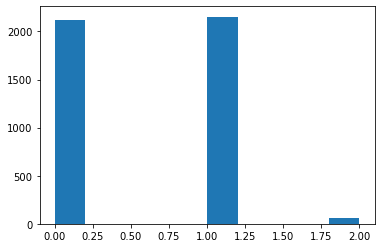

In [204]:
plt.hist(df['fuel'])

(array([1096.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3244.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

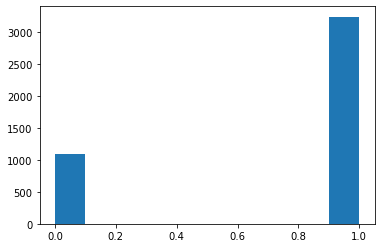

In [205]:
plt.hist(df['seller_type'])

In [206]:
# we now try to get the age of the car instead of its birth year 
df2['Current_Year'] = 2020
df['Current_Year'] = 2020
df2.head()

,year,selling_price,km_driven,fuel_Petrol,fuel_other,seller_type_Individual,transmission_Manual,owner_Second Owner,owner_other,Current_Year
0,2007,60000,70000,1,0,1,1,0,0,2020
1,2007,135000,50000,1,0,1,1,0,0,2020
2,2012,600000,100000,0,0,1,1,0,0,2020
3,2017,250000,46000,1,0,1,1,0,0,2020
4,2014,450000,141000,0,0,1,1,1,0,2020


In [207]:
df2['No_Years'] = df2['Current_Year'] - df2['year']
df['No_Years'] = df['Current_Year'] - df['year']
df2.head()

,year,selling_price,km_driven,fuel_Petrol,fuel_other,seller_type_Individual,transmission_Manual,owner_Second Owner,owner_other,Current_Year,No_Years
0,2007,60000,70000,1,0,1,1,0,0,2020,13
1,2007,135000,50000,1,0,1,1,0,0,2020,13
2,2012,600000,100000,0,0,1,1,0,0,2020,8
3,2017,250000,46000,1,0,1,1,0,0,2020,3
4,2014,450000,141000,0,0,1,1,1,0,2020,6


In [208]:
df2.drop(columns=['year', 'Current_Year'], axis=1, inplace=True)
df.drop(columns=['year', 'Current_Year'], axis=1, inplace=True)
df2.head()

,selling_price,km_driven,fuel_Petrol,fuel_other,seller_type_Individual,transmission_Manual,owner_Second Owner,owner_other,No_Years
0,60000,70000,1,0,1,1,0,0,13
1,135000,50000,1,0,1,1,0,0,13
2,600000,100000,0,0,1,1,0,0,8
3,250000,46000,1,0,1,1,0,0,3
4,450000,141000,0,0,1,1,1,0,6


In [209]:
df2.corr()

,selling_price,km_driven,fuel_Petrol,fuel_other,seller_type_Individual,transmission_Manual,owner_Second Owner,owner_other,No_Years
selling_price,1.000000,-0.192289,-0.269453,-0.056200,-0.236798,-0.530205,-0.161986,-0.124243,-0.413922
km_driven,-0.192289,1.000000,-0.291139,0.023575,0.182663,0.120226,0.195203,0.198883,0.419688
fuel_Petrol,-0.269453,-0.291139,1.000000,-0.119719,0.029845,0.039614,-0.012717,0.000562,0.114908
fuel_other,-0.056200,0.023575,-0.119719,1.000000,0.022713,0.035224,0.038121,0.013661,0.027126
seller_type_Individual,-0.236798,0.182663,0.029845,0.022713,1.000000,0.214163,0.186573,0.134491,0.173703
transmission_Manual,-0.530205,0.120226,0.039614,0.035224,0.214163,1.000000,0.068068,0.045706,0.143800
owner_Second Owner,-0.161986,0.195203,-0.012717,0.038121,0.186573,0.068068,1.000000,-0.186846,0.292349
owner_other,-0.124243,0.198883,0.000562,0.013661,0.134491,0.045706,-0.186846,1.000000,0.281436
No_Years,-0.413922,0.419688,0.114908,0.027126,0.173703,0.143800,0.292349,0.281436,1.000000


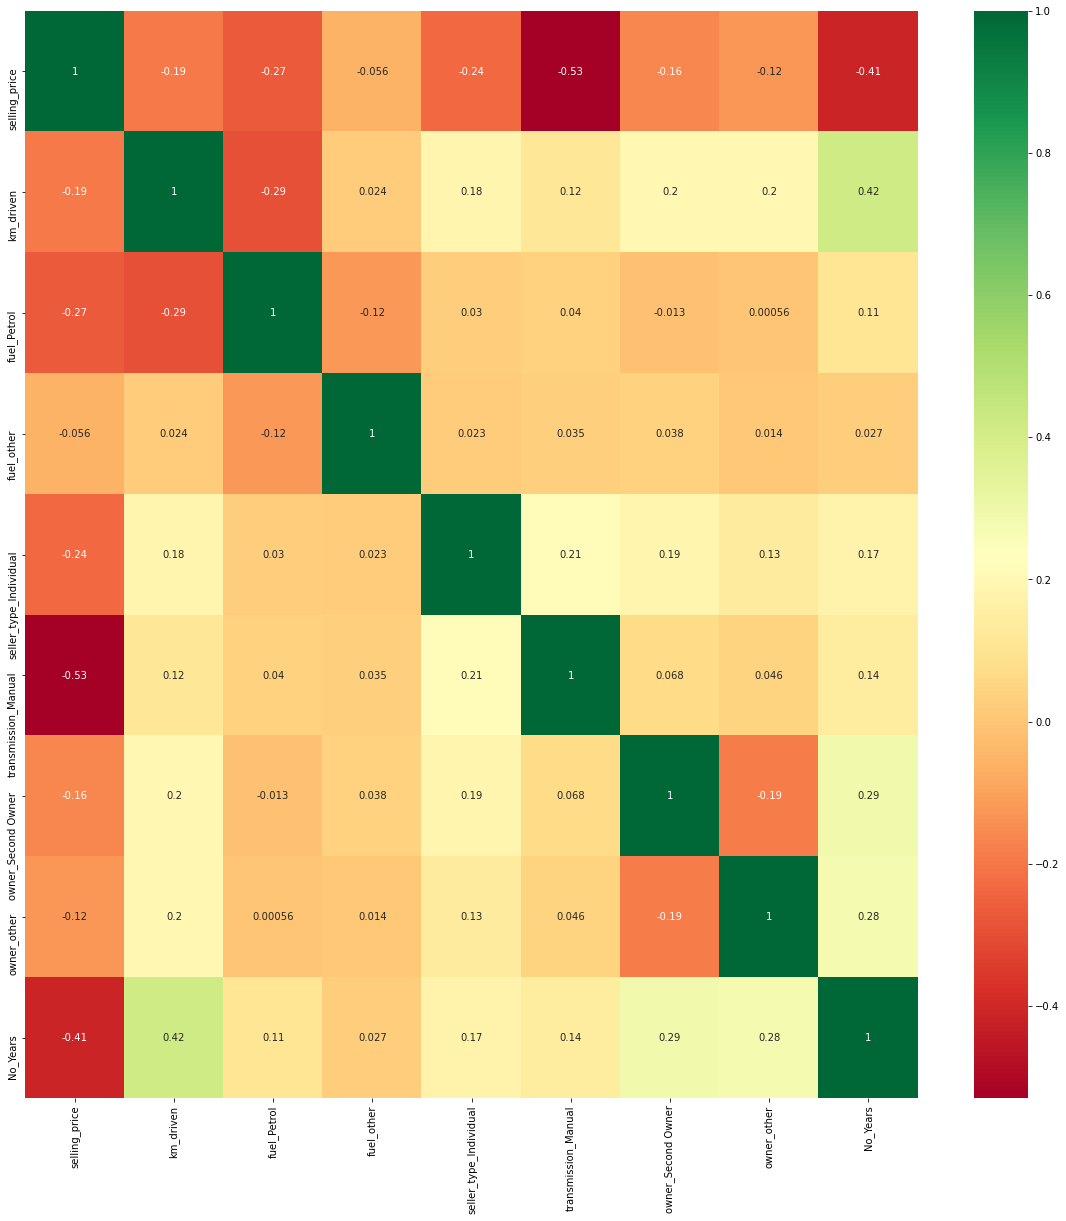

In [210]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df2.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df2[top_corr_features].corr(),annot=True,cmap="RdYlGn")

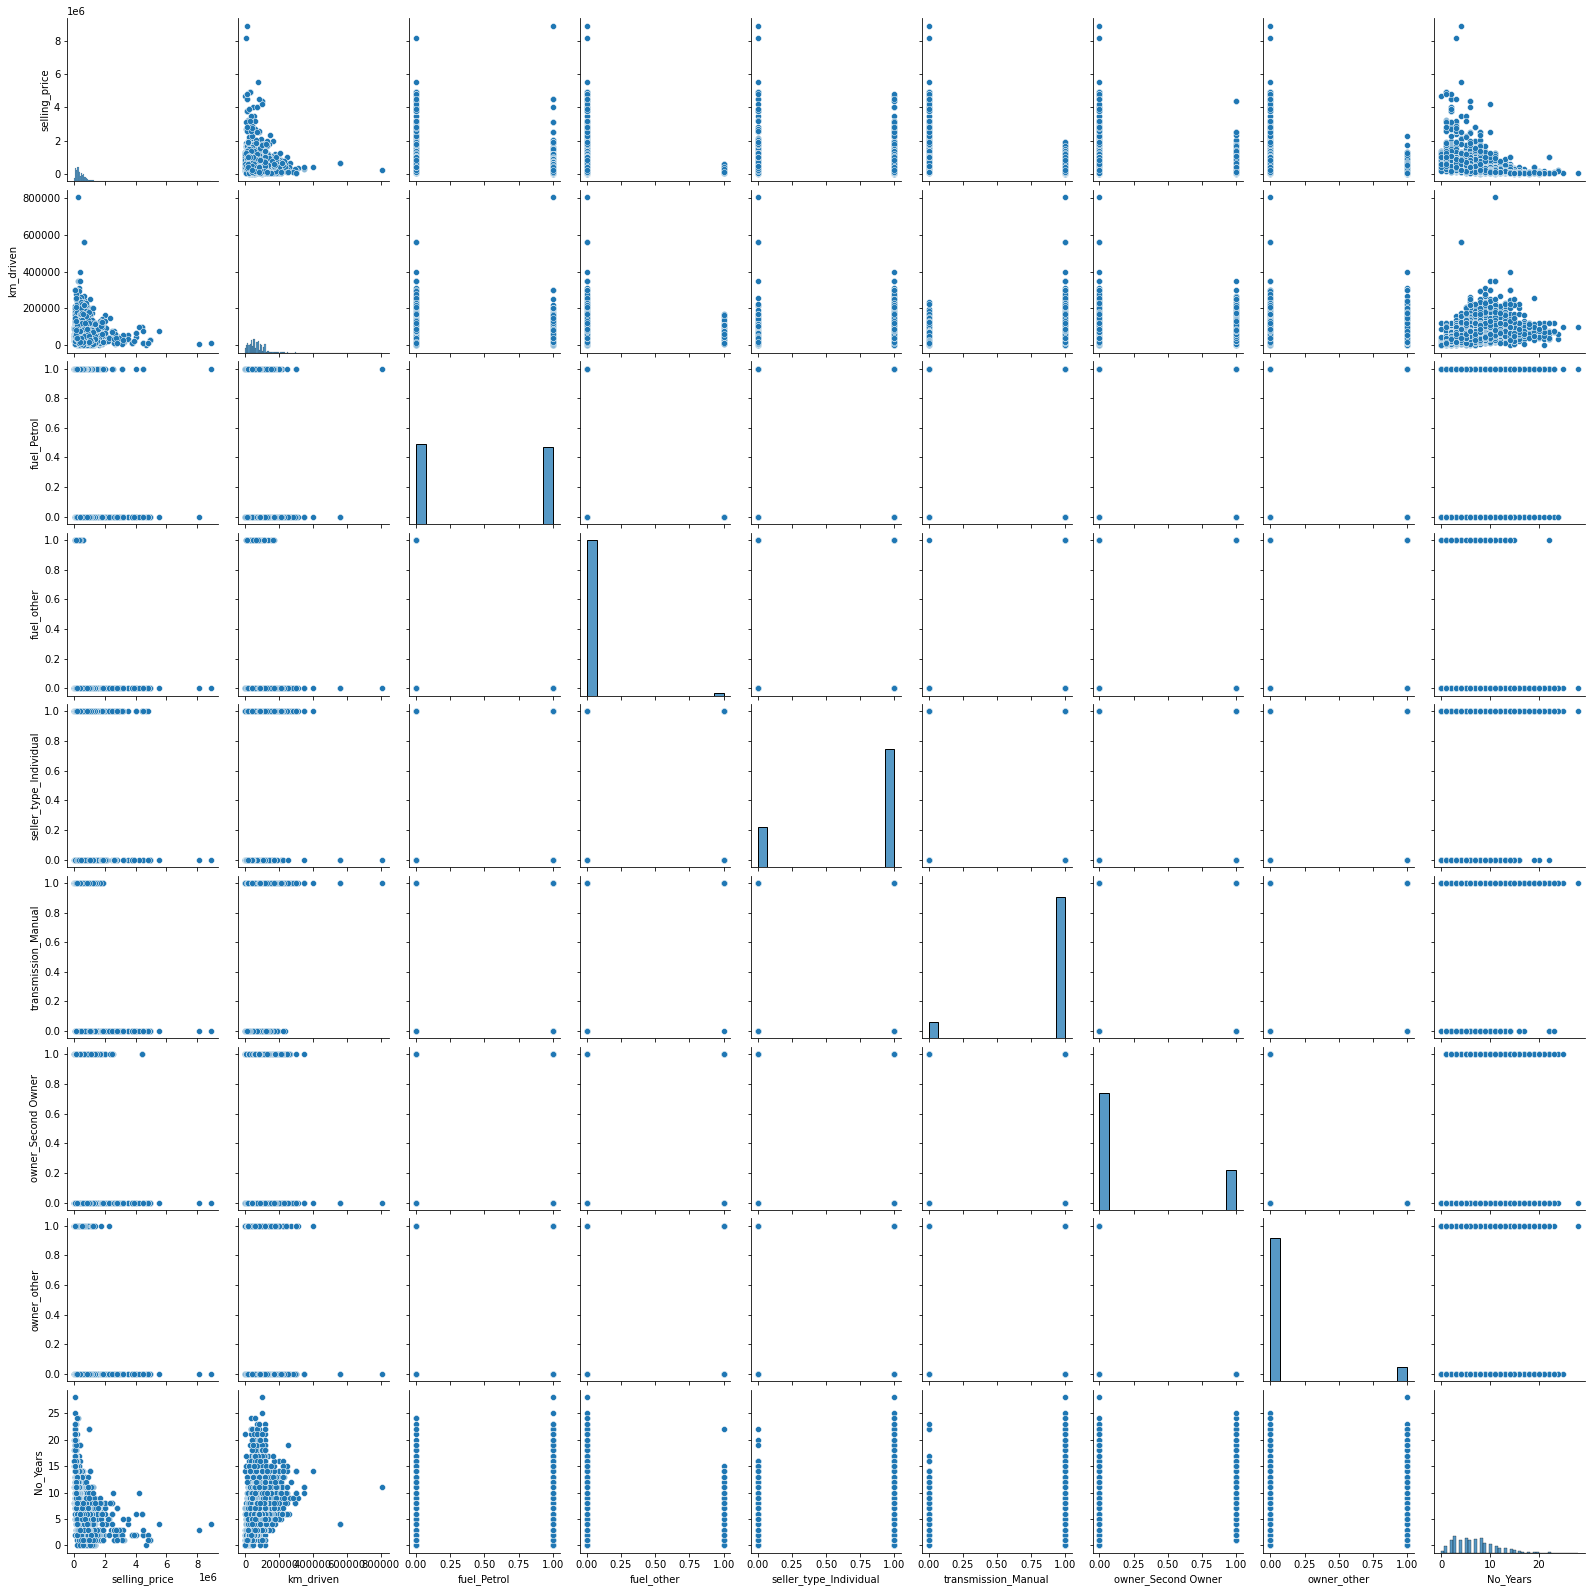

In [211]:
sns.pairplot(df2)

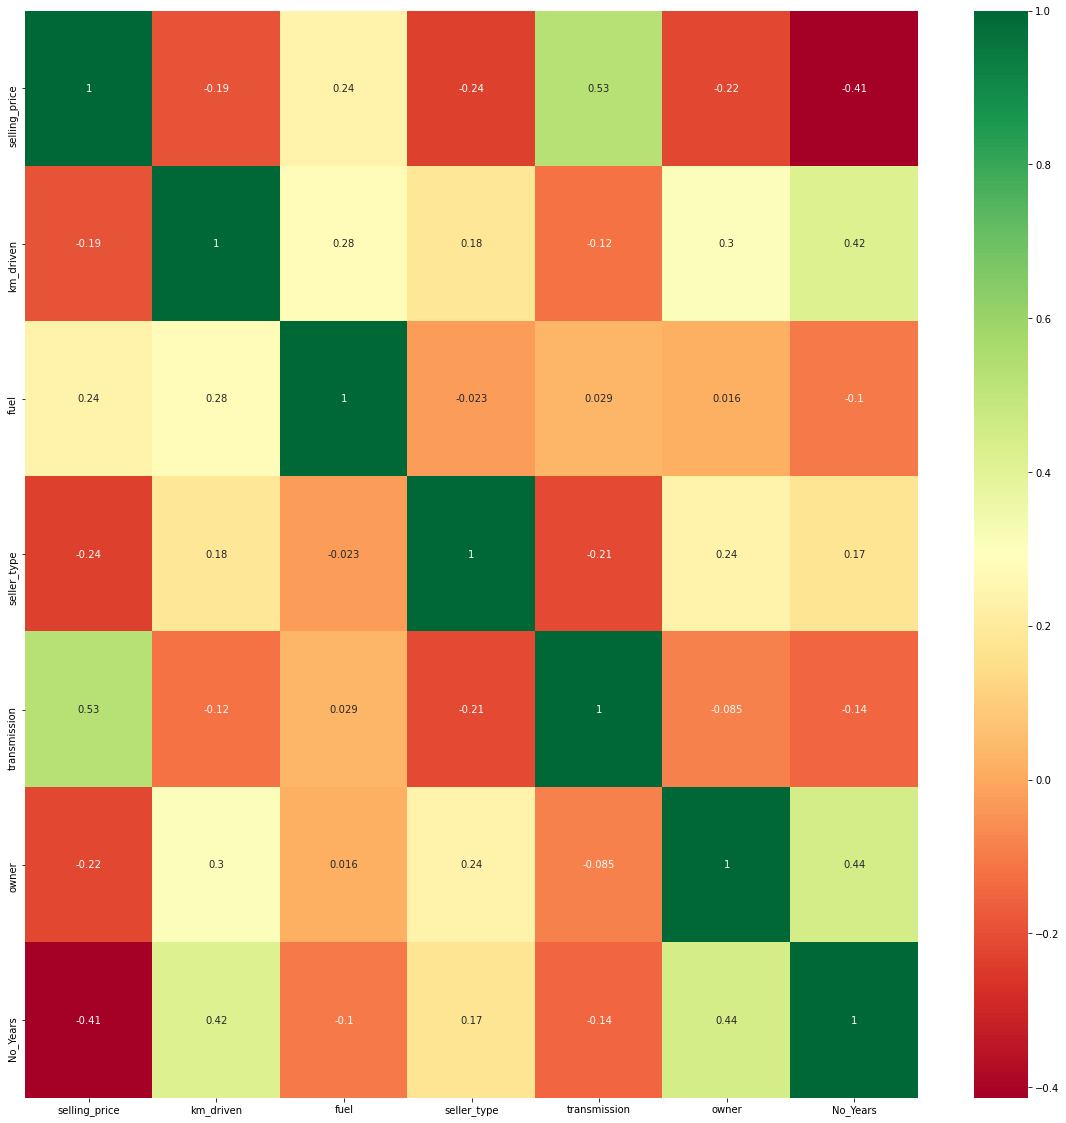

In [212]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

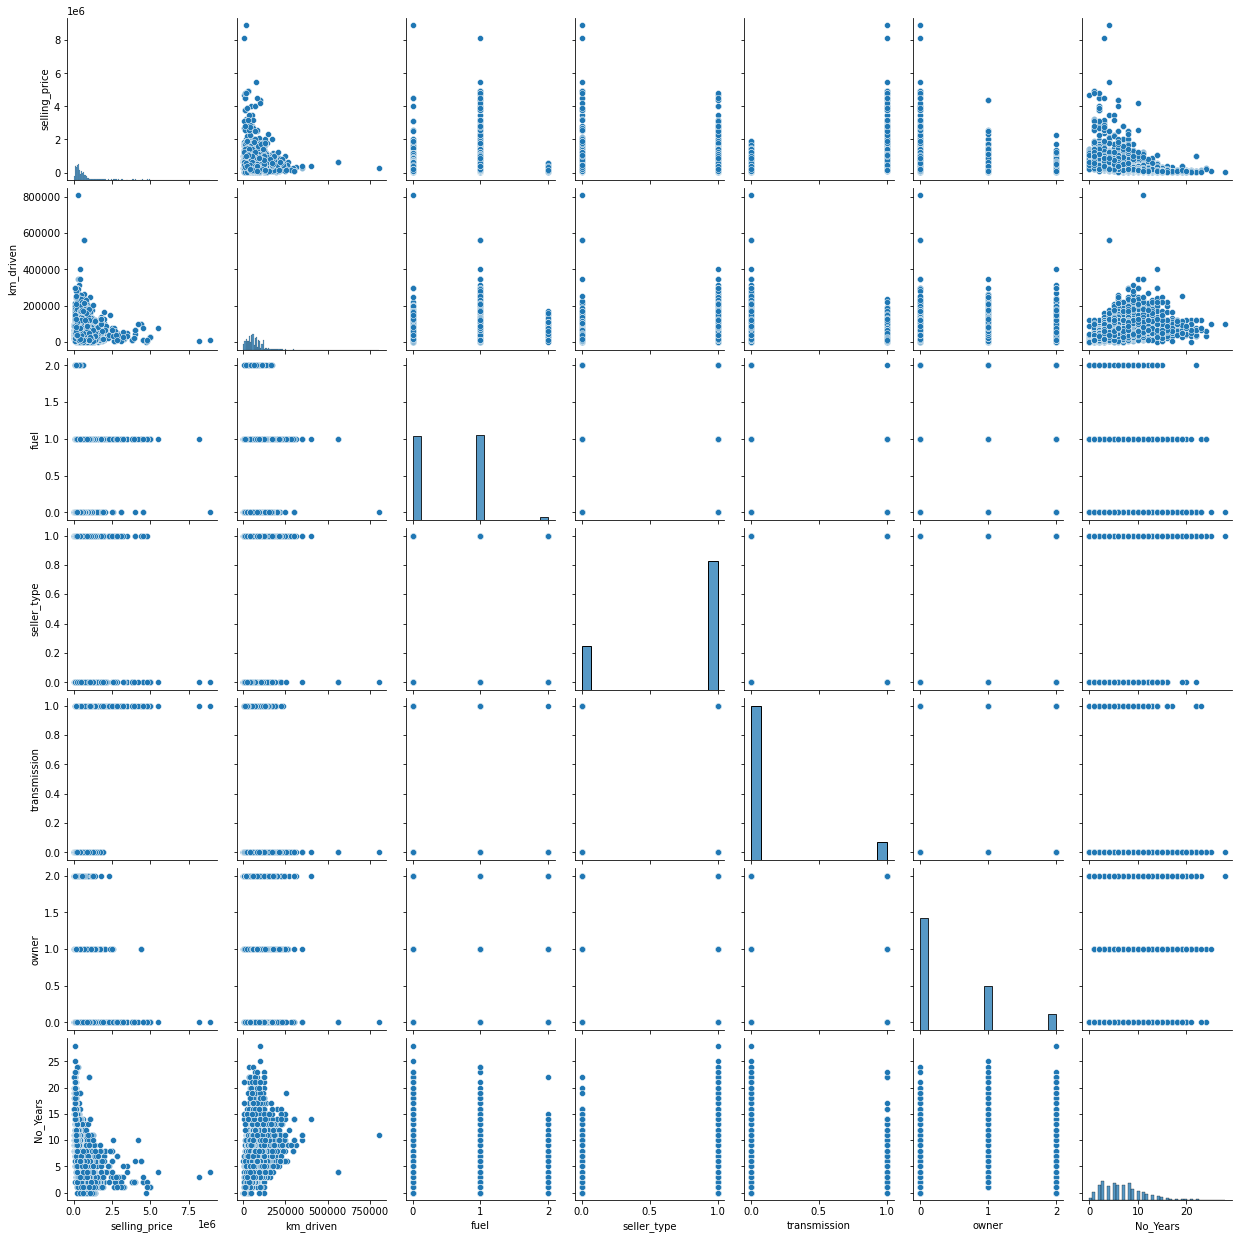

In [213]:
sns.pairplot(df)

df2 = df.copy()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df2['Kms_Driven'] = scaler.fit_transform(np.array(df2['Kms_Driven']).reshape(-1,1))
#df2 = pd.DataFrame(df2)
df2.head()

In [214]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [215]:
X.head()

,km_driven,fuel,seller_type,transmission,owner,No_Years
0,70000,0,1,0,0,13
1,50000,0,1,0,0,13
2,100000,1,1,0,0,8
3,46000,0,1,0,0,3
4,141000,1,1,0,1,6


In [216]:
y.head()

0     60000
1    135000
2    600000
3    250000
4    450000
Name: selling_price, dtype: int64

In [217]:
### Feature Importance -- used for selecting the top features

from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [218]:
print(model.feature_importances_)

[0.25380331 0.13422016 0.04386974 0.29286499 0.03213484 0.24310696]


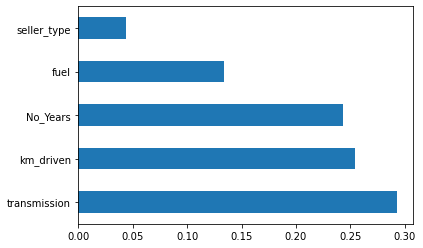

In [219]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [220]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [221]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()

In [222]:
from sklearn.model_selection import RandomizedSearchCV

In [223]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [224]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [225]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.5s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   4.2s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.5s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.6s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.1min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [226]:
rf_random.best_params_

{'n_estimators': 1100,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 15}

In [227]:
rf_random.best_score_

-126817669232.10513

In [228]:
predictions=rf_random.predict(X_test)

C:\Users\home\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='selling_price', ylabel='Density'>

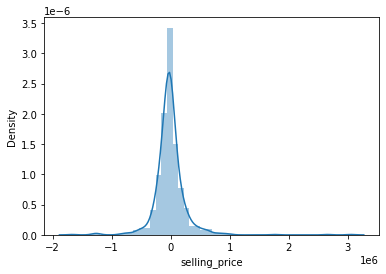

In [229]:
sns.distplot(y_test-predictions)

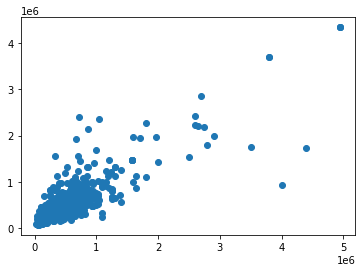

In [230]:
plt.scatter(y_test,predictions)

In [231]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 154226.53771073528
MSE: 75644772438.09392
RMSE: 275035.9475379426


In [232]:
metrics.r2_score(y_test, predictions)

0.7344637469517732

In [233]:
X=df2.iloc[:,1:]
y=df2.iloc[:,0]

In [234]:
X.head()

,km_driven,fuel_Petrol,fuel_other,seller_type_Individual,transmission_Manual,owner_Second Owner,owner_other,No_Years
0,70000,1,0,1,1,0,0,13
1,50000,1,0,1,1,0,0,13
2,100000,0,0,1,1,0,0,8
3,46000,1,0,1,1,0,0,3
4,141000,0,0,1,1,1,0,6


In [235]:
### Feature Importance

from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [236]:
print(model.feature_importances_)

[0.25646125 0.12584321 0.00278289 0.04616144 0.29286925 0.02384909
 0.00615364 0.24587923]


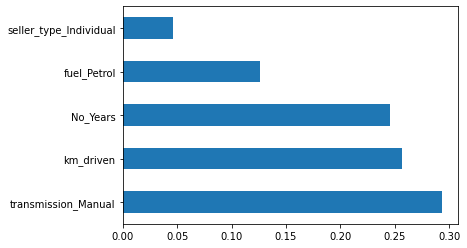

In [237]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [238]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [239]:
# For df1
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random1 = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
rf_random1.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.1s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   3.3s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.3s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.3s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.3s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.3s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.6s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.9min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [240]:
rf_random1.best_params_

{'n_estimators': 1100,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 15}

In [241]:
rf_random1.best_score_

-130154427848.4207

In [242]:
predictions1=rf_random1.predict(X_test)

C:\Users\home\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='selling_price', ylabel='Density'>

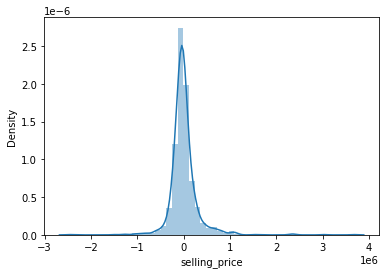

In [243]:
sns.distplot(y_test-predictions1)

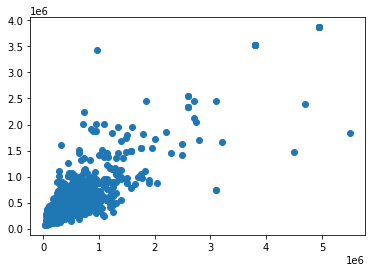

In [244]:
plt.scatter(y_test,predictions1)

In [245]:
print("With dummies")
print('MAE-1:', metrics.mean_absolute_error(y_test, predictions1))
print('MSE-1:', metrics.mean_squared_error(y_test, predictions1))
print('RMSE-1:', np.sqrt(metrics.mean_squared_error(y_test, predictions1)))

With dummies
MAE-1: 171340.7230796993
MSE-1: 97786179794.04135
RMSE-1: 312707.8185687741


In [246]:
metrics.r2_score(y_test, predictions1)

0.7132036248267362

### As we can see from the above results that the better score came for the result without using the dummies.

In [248]:
import pickle
# open a file, where you ant to store the data
file = open('rf_reg_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)
file.close()

In [251]:
# open a file, where you ant to store the data
file = open('rf_reg_model_1.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random1, file)
file.close()

In [249]:
infile = open('rf_reg_model.pkl', 'rb')
file1 = pickle.load(infile)

In [250]:
infile.close()